# Model: Random Forest Regressor
This notebook documents our process of approaching the given regression task using a RandomForestRegressor. The following approaches are documented:
* paramter optimization using RandomizedSearchCV
* paramter optimization using Hyperopt
* each of the mentioned approaches is tried with K-Fold CrossValidation and TimeSeriesSplit CrossValidation

In [12]:
from sklearn.metrics import mean_squared_error
import data_preprocessing
from sklearn.ensemble import RandomForestRegressor
from hyperopt import hp, space_eval, tpe, fmin, Trials
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt

In [13]:
# import preprocessed data
train, test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

In [14]:
# separate features from target variable
def split_x_y(df):
    y = df["Energy Consumption"]
    X = df.drop("Energy Consumption", axis=1)
    return X, y

X_train, y_train = split_x_y(train)
X_test, y_test = split_x_y(test)

## Using RandomizedSearchCV
First, we need to create a search grid / parameter distribution for RandomizedSearchCV to select from

### Using K-Fold CrossVal

In [15]:
best_params = {
	'n_estimators': 283,
	'min_samples_split': 7,
	'min_samples_leaf': 2,
	'max_samples': 0.7142857142857143,
    'max_leaf_nodes': None,
	'max_features': 'log2',
	'max_depth': 75
}

RMSE:  9870.294855657023
NRMSE:  0.1457386359102416


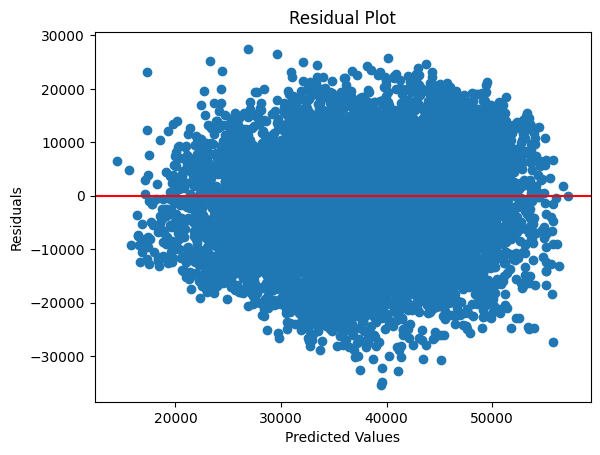

In [16]:
# Train the model on the whole dataset and predict unseen data to assess it's real performance
rf = RandomForestRegressor(**best_params, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
print("NRMSE: ", rmse / (y_test.max() - y_test.min()))

plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

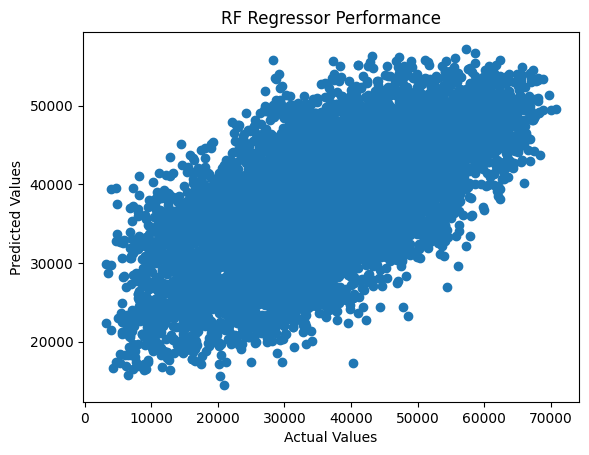

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RF Regressor Performance')
plt.show()